<a href="https://www.kaggle.com/code/kapturovalexander/reflection-of-the-space-invasion?scriptVersionId=196881654" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/space-invasion/operative_information.csv
/kaggle/input/space-invasion/invasion.csv
/kaggle/input/space-invasion/space_can_be_a_dangerous_place.csv


## Table of Contents #

- [1 - Import libraries](#1)
- [2 - Load data](#2)
- [3 - Display invasion data](#3)
- [4 - Display invasion shape](#4)
- [5 - Split data into X and y](#5)
- [6 - Find best parameters using Random Search](#6)
- [7 - Display Operative Information shape](#7)
- [8 - Predict response](#8)
- [9 - Feature importance](#9)
- [10 - Space df shape](#10)
- [11 - Display Space data](#11)
- [12 - Dangerous or not?](#12)
- [13 - Figure out best parameters for Random Forest](#13)
- [14 - Create Random Forest with best parameters](#14)

<a id='1'></a>
# <span style="color: blue">1 - Import libraries</span> #

In [2]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

<a id='2'></a>
# <span style="color: blue">2 - Load data</span> #

In [3]:
invasion = pd.read_csv('/kaggle/input/space-invasion/invasion.csv')
operative_information = pd.read_csv('/kaggle/input/space-invasion/operative_information.csv')
space = pd.read_csv('/kaggle/input/space-invasion/space_can_be_a_dangerous_place.csv')

<a id='Part_1'></a>
## <span style="color: black">Part 1</span> #

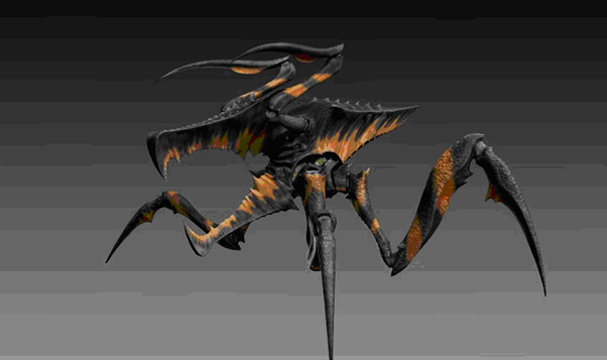

The Earth is attacked by bugger troops, and their fleet includes transports, fighters and cruisers. To combat each type of ship, a different type of weapon is used. As an analyst from the Defense Headquarters, you are tasked with developing a model that predicts which ships are involved in an attack,
to successfully repel attacks on various areas of the planet

We managed to collect little data, and we will have to predict a much larger array.

Train the model and predict ship classes for new incoming data. Indicate in your answer, separated by a space, the number of cruisers, transports and fighters.
The fate of humanity depends on your answer!

<a id='3'></a>
# <span style="color: blue">3 - Display invasion data</span> #

In [4]:
invasion.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


<a id='4'></a>
# <span style="color: blue">4 - Display invasion shape</span> #

In [5]:
invasion.shape

(500, 7)

In [6]:
invasion.describe()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,7.514471,6.782598,225.959106,0.335078,293557.236000,81.336123
std,3.865046,2.274478,202.852757,0.189641,162370.270371,136.624929
min,0.860820,2.004911,10.865759,0.100030,137.000000,9.152254
25%,3.925305,5.036264,62.669515,0.153777,159892.000000,11.947038
50%,7.367569,7.069033,110.044266,0.333999,311942.500000,40.169555
75%,10.574544,8.675668,372.838559,0.489826,432034.750000,46.849032
max,17.089350,11.481238,695.871423,0.791757,567040.000000,496.882090


In [7]:
invasion.describe(include=['object', 'bool'])

,class
count,500
unique,3
top,fighter
freq,225


## Pivot tables

<a id='5'></a>
# <span style="color: blue">5 - Split data into X and y</span> #

In [8]:
X = invasion.drop('class', axis=1)
y = invasion['class']

<a id='6'></a>
# <span style="color: blue">6 - Find best parameters using Random Search</span> #

In [9]:
random = RandomForestClassifier(random_state=25)

parameters = {
    'n_estimators': range(1, 1000),
    'max_depth': range(3, 101),
    'min_samples_leaf': range(1, 101),
    'min_samples_split': range(2, 101, 2)
}

random_search = RandomizedSearchCV(estimator=random, param_distributions=parameters, n_jobs=-1, cv=5)
random_search.fit(X, y)
random_search.best_params_

{'n_estimators': 117,
 'min_samples_split': 86,
 'min_samples_leaf': 3,
 'max_depth': 45}

<a id='7'></a>
# <span style="color: blue">7 - Display Operative Information shape</span> #

In [10]:
operative_information.shape

(1500, 6)

<a id='8'></a>
# <span style="color: blue">8 - Predict response</span> #

In [11]:
y_pred = random_search.predict(operative_information)
pd.Series(data=y_pred).value_counts()

fighter      675
transport    595
cruiser      230
Name: count, dtype: int64

Which variable was found to be most important in classifying ships?

<a id='9'></a>
# <span style="color: blue">9 - Feature importance</span> #

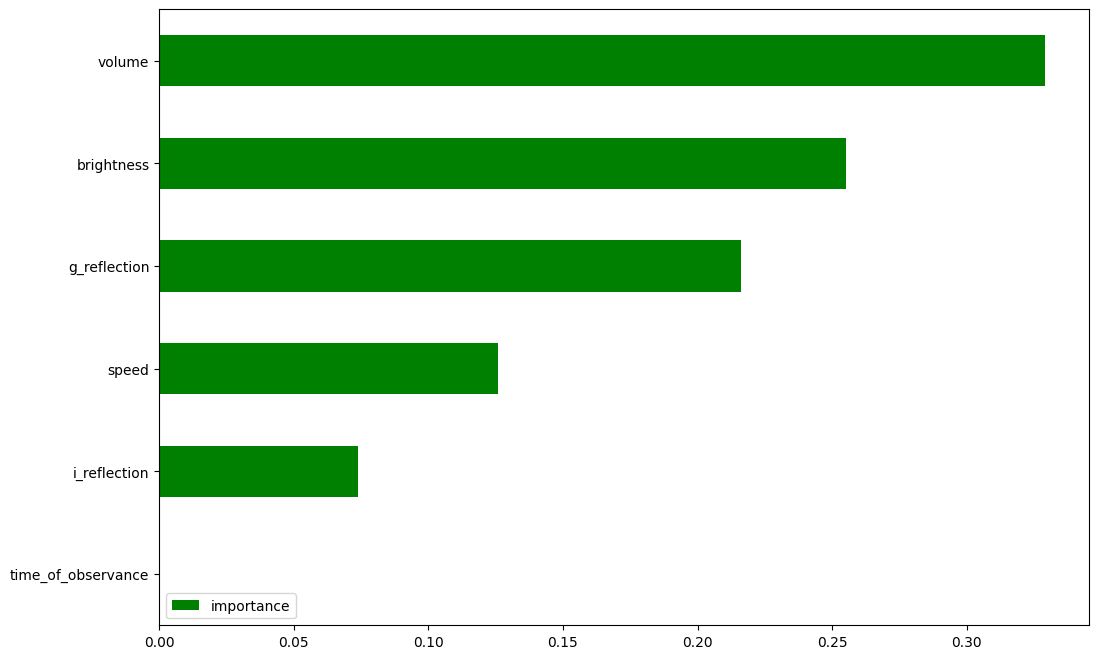

In [12]:
best_forest = RandomForestClassifier(
    n_estimators=278,
    min_samples_split=36,
    min_samples_leaf=2,
    max_depth=71,
    random_state=25
)
    
best_forest.fit(X, y)
importance = best_forest.feature_importances_

pd.DataFrame(data=importance, index=X.columns, columns=['importance']) \
    .sort_values(ascending=True, by='importance') \
    .plot(kind='barh', figsize=(12, 8), color='green');

<a id='Part_2'></a>
## <span style="color: black">Part 2</span> #

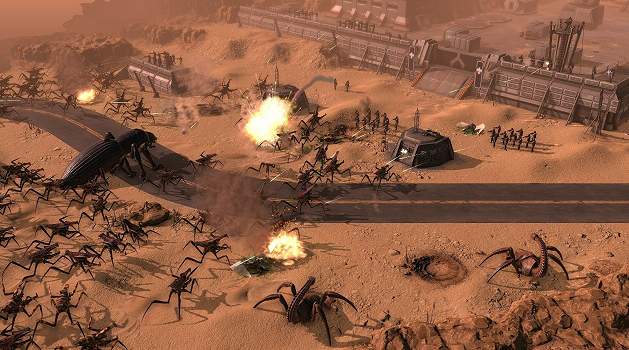

Thanks to your efforts, the invading troops were defeated, but the war is not over yet! You have been promoted and transferred to a new direction (new positions - new tasks) - now you need to identify dangerous regions of space where bugs may be located.

Analyze available data on the dangers of different regions of space and indicate the most likely causes of the threat

<a id='10'></a>
# <span style="color: blue">10 - Space df shape</span> #

In [13]:
space.shape

(100000, 8)

<a id='11'></a>
# <span style="color: blue">11 - Display Space data</span> #

In [14]:
space.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


## Pivot tables

In [15]:
pd.crosstab(index=space['dangerous'], columns=space['nearby_system_has_planemo'])

nearby_system_has_planemo,0,1
dangerous,,
0,965,8833
1,0,90202


In [16]:
pd.crosstab(index=space['dangerous'], columns=space['nearby_system_has_planemo'], normalize=True)

nearby_system_has_planemo,0,1
dangerous,,
0,0.00965,0.08833
1,0.00000,0.90202


In [17]:
pd.pivot_table(data=space, values='dangerous', index='nearby_system_has_planemo', columns='black_hole_is_near', aggfunc='count')

black_hole_is_near,0,1
nearby_system_has_planemo,,
0,867,98
1,88134,10901


<a id='12'></a>
# <span style="color: blue">12 - Dangerous or not?</span> #

In [18]:
space.dangerous.value_counts()

dangerous
1    90202
0     9798
Name: count, dtype: int64

In [19]:
# Leave only dangerous situations
danger = space[space.dangerous == 1]
danger.dangerous.value_counts()

dangerous
1    90202
Name: count, dtype: int64

In [20]:
# Leave only not dangerous situations
not_danger = space[space.dangerous == 0]
not_danger.dangerous.value_counts()

dangerous
0    9798
Name: count, dtype: int64

In [21]:
# Values counts for dangerous
for reason in ['black_hole_is_near', 'buggers_were_noticed', 'nearby_system_has_planemo']:
    print(danger[reason].value_counts())
    print()

black_hole_is_near
0    79788
1    10414
Name: count, dtype: int64

buggers_were_noticed
1    86500
0     3702
Name: count, dtype: int64

nearby_system_has_planemo
1    90202
Name: count, dtype: int64



In [22]:
# Value counts for not-dangerous
for reason in ['black_hole_is_near', 'buggers_were_noticed', 'nearby_system_has_planemo']:
    print(not_danger[reason].value_counts())
    print()

black_hole_is_near
0    9213
1     585
Name: count, dtype: int64

buggers_were_noticed
1    6499
0    3299
Name: count, dtype: int64

nearby_system_has_planemo
1    8833
0     965
Name: count, dtype: int64



<a id='13'></a>
# <span style="color: blue">13 - Figure out best parameters for Random Forest</span> #

In [23]:
%%time
X = space.drop('dangerous', axis=1)
y = space['dangerous']

model = RandomForestClassifier(random_state=27)

parameters = {
    'n_estimators': range(1, 100, 5),
    'max_depth': range(3, 21, 2),
    'min_samples_leaf': range(1, 51, 2),
    'min_samples_split': range(2, 101, 2)
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=parameters,
    n_jobs=-1,
    cv=5,
    random_state=27
)

random_search.fit(X, y)
print(random_search.best_params_)

{'n_estimators': 96, 'min_samples_split': 14, 'min_samples_leaf': 11, 'max_depth': 3}
CPU times: user 5.55 s, sys: 176 ms, total: 5.73 s
Wall time: 1min 19s


<a id='14'></a>
# <span style="color: blue">14 - Create Random Forest with best parameters</span> #

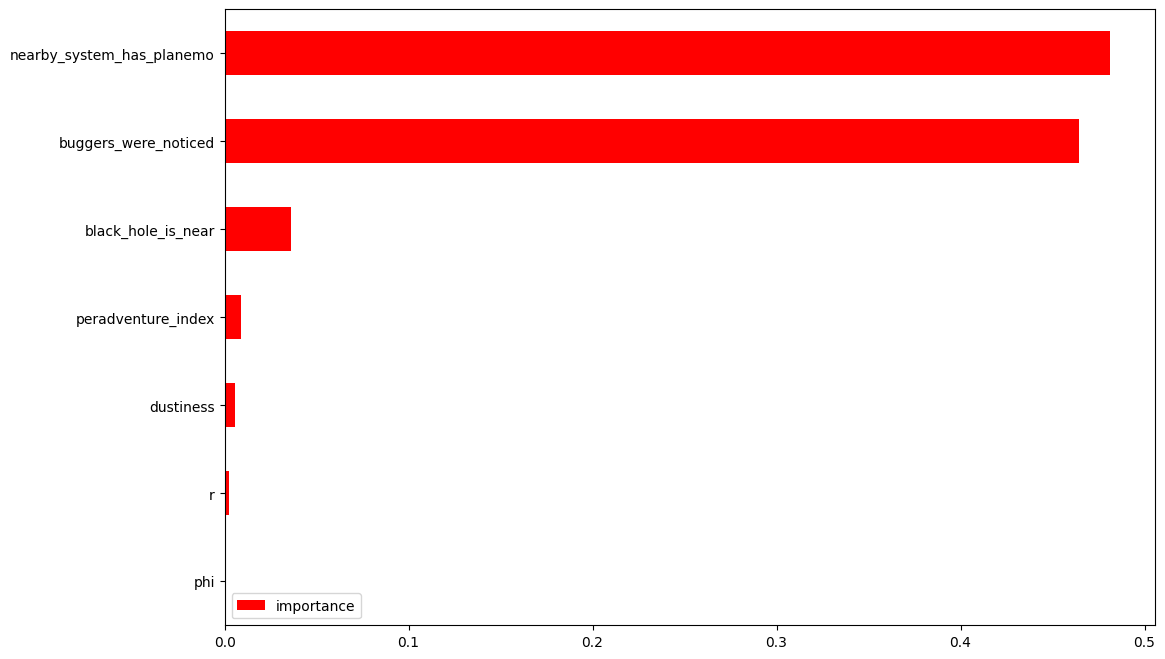

In [24]:
# Create Random Forest with best parameters
best_forest = RandomForestClassifier(
    n_estimators=96,
    min_samples_split=14,
    min_samples_leaf=11,
    max_depth=3,
    random_state=27
)
    
best_forest.fit(X, y)
importance = best_forest.feature_importances_

pd.DataFrame(data=importance, index=X.columns, columns=['importance']) \
    .sort_values(ascending=True, by='importance') \
    .plot(kind='barh', figsize=(12, 8), color='red');

The **presence of bugs** in the system is an obvious signal of danger

The **presence of a planemo** increases the danger - perhaps the bugs are building their bases on these bodies

# <span style="color: brown">Hope this little tutorial helped You try Random Forest and configure hyperparameters!